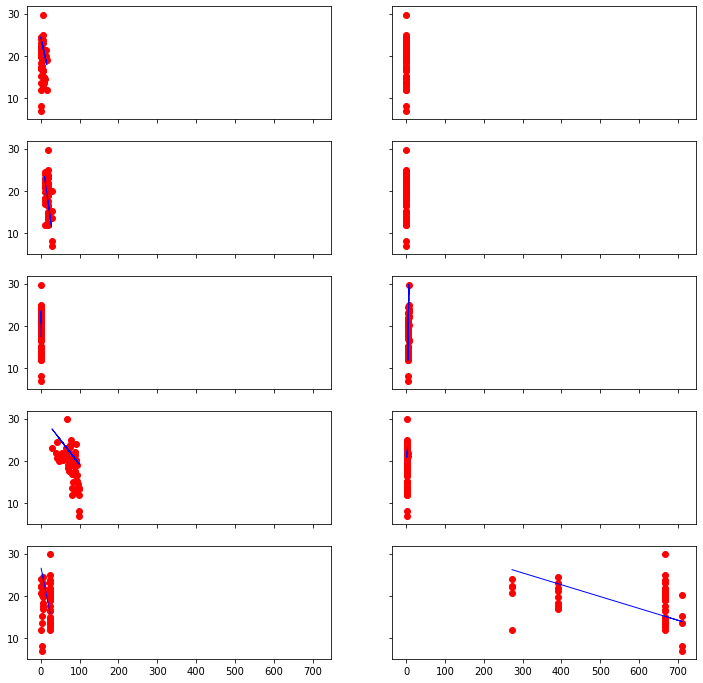

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

## Wizualizacja dla zbioru boston
# Załadowanie danych
boston = datasets.load_boston()
f, axarr = plt.subplots(5,2, sharex=True, sharey=True,figsize=(12,12))
for i in range(0,5):
    for j in range(0,2):
        # Użycie tylko funkcji
        boston_X = boston.data[:, np.newaxis, i*2+j]
        boston_Y = boston.target
        
        # Podział na dane uczące
        boston_x_train = boston_X[:-50]
        boston_y_train = boston_Y[:-50]
        
        # Podział na dane testowe
        boston_x_test = boston_X[-50:]
        boston_y_test = boston_Y[-50:]
        
        # Stworzenie obiektu liniowej regresji
        regr = linear_model.LinearRegression()
        
        # Train the model using the training sets
        regr.fit(boston_x_train, boston_y_train)
        
        # Wyświetlenie rezultatu
        axarr[i,j].scatter(boston_x_test, boston_y_test,  color='red')
        axarr[i,j].plot(boston_x_test, regr.predict(boston_x_test), color='blue', linewidth=1)
        
plt.show()

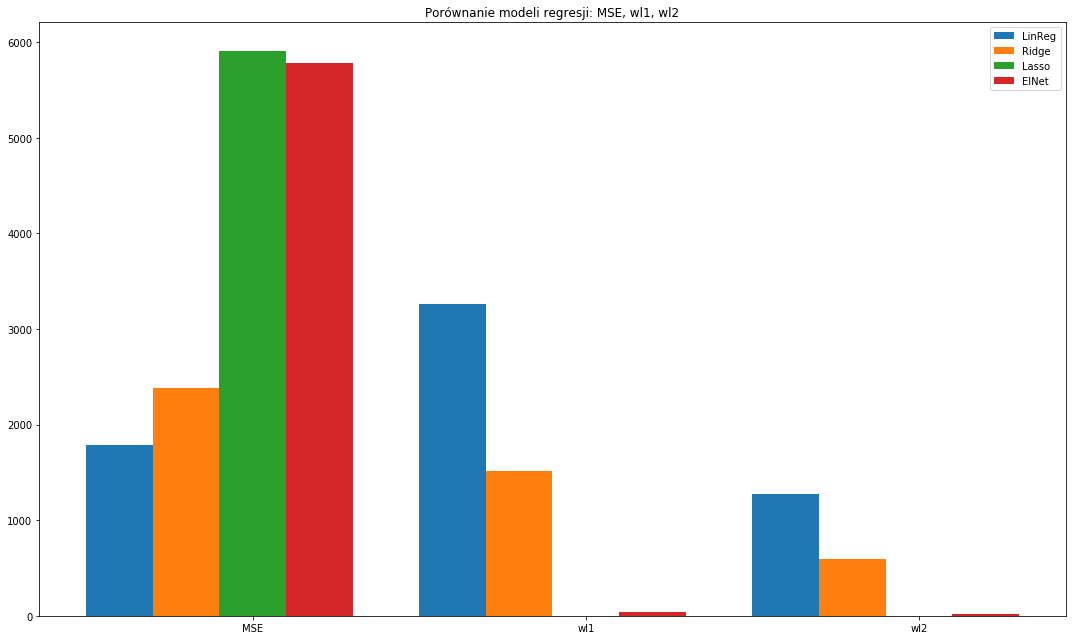

In [7]:
## Porównanie modeli regresji dla zbioru diabetes
# Załadowanie danych 
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_Y = diabetes.target

# Dane uczące
diabetes_X_train = diabetes_X[:-50]
diabetes_y_train = diabetes_Y[:-50]

# Dane testowe
diabetes_X_test = diabetes_X[-50:]
diabetes_y_test = diabetes_Y[-50:]
# Modele regresji
regressors = {}
regressors['LinReg'] =linm.LinearRegression()
regressors['Ridge'] = linm.Ridge(alpha = .5)
regressors['Lasso'] = linm.Lasso(alpha = 5.1)
regressors['ElNet'] = linm.ElasticNet(alpha = .5, l1_ratio=0.5)
fit_results={}
for key in regressors:
    regr = regressors[key]
    regr.fit(diabetes_X_train, diabetes_y_train)
    mse = np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
    w = regr.coef_
    wl1 = np.sum(np.abs(w))
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
    groups = 3
index = np.arange(groups)
bar_width = .2
opacity = 0.4
fig, ax = plt.subplots(figsize=(15,9))
t=0
for key in regressors:
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, res_val, bar_width, label=key)
    t+=1
plt.title('Porównanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()
plt.tight_layout()
plt.show()

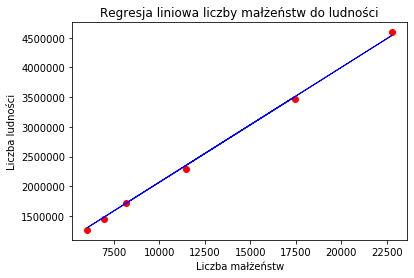

In [28]:
## Regresja liniowa
import pandas as pd

marriages = pd.read_csv('marriages.csv', sep=';', encoding='iso-8859-1')

population = marriages.population
number_of_marriages = marriages.marriages

X_train = number_of_marriages[:-10]
Y_train = population[:-10]

X_test = number_of_marriages[-6:]
Y_test = population[-6:]

regr = linear_model.LinearRegression()

regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))

plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa liczby małżeństw do ludności')
plt.ylabel('Liczba ludności')
plt.xlabel("Liczba małżeństw")
plt.show()

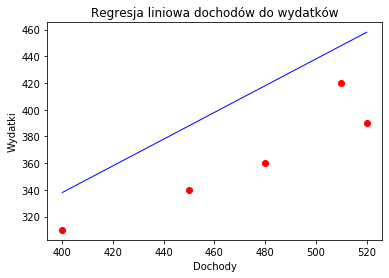

In [33]:
dochodyCsv = pd.read_csv('dochody.csv', sep=';')

dochody = dochodyCsv.dochody
wydatki = dochodyCsv.wydatki

X_train = dochody[:-5]
Y_train = wydatki[:-5]

X_test = dochody[-5:]
Y_test = wydatki[-5:]

regr = linear_model.LinearRegression()

regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))
        
plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa dochodów do wydatków')
plt.ylabel('Wydatki')
plt.xlabel("Dochody")
plt.show()

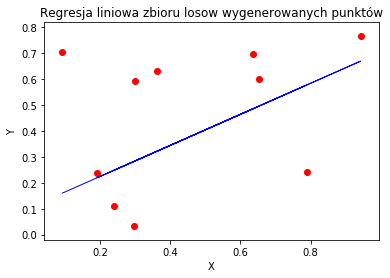

In [49]:
## Prosta regresji dla 100 losowo wygenerowych punktów

points = np.random.uniform(0,1, size=(2, 100))

X_train = points[0,:-90]
Y_train = points[1,:-90]

X_test = points[0,-10:]
Y_test = points[1,-10:]

regr = linear_model.LinearRegression()

regr.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))
        
plt.scatter(X_test, Y_test,  color='red')
plt.plot(X_test, regr.predict(X_test.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa zbioru losow wygenerowanych punktów')
plt.ylabel('Y')
plt.xlabel("X")
plt.show()